(Diffusion through a crack) Simulate an unbiased random walk
(Pr(H) = Pr(T )=0.5) with some obstacles. (a) Put a reflecting barrier at
x = −4, i.e., the walk may land at −4 but may not stay there, and the next
step must be to −3. Plot a sample path and a histogram. (b) Next add a
partial block at x = +6, i.e., at x = 6 there is only a 0.25 chance of going
to 7 and a 0.75 chance of going to 5 (same for 7 to 6). Plot a histogram.
These are results that are hard to get in any way other than by simulation.

In [11]:
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import sin, cos

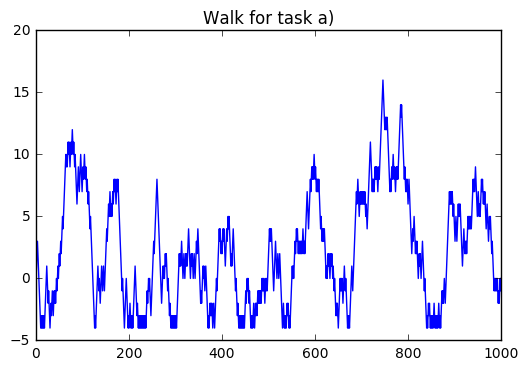

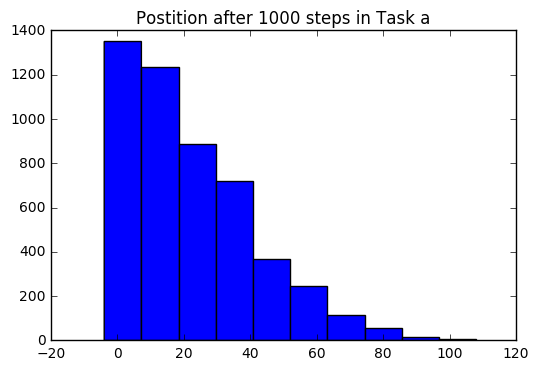

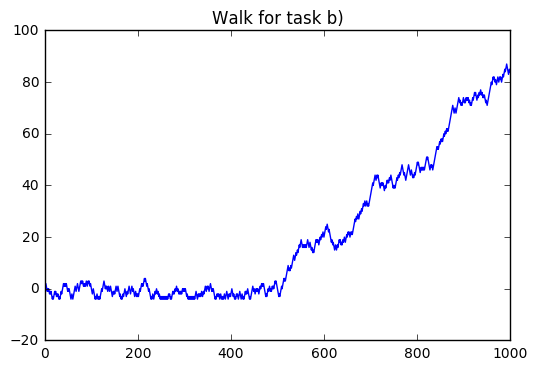

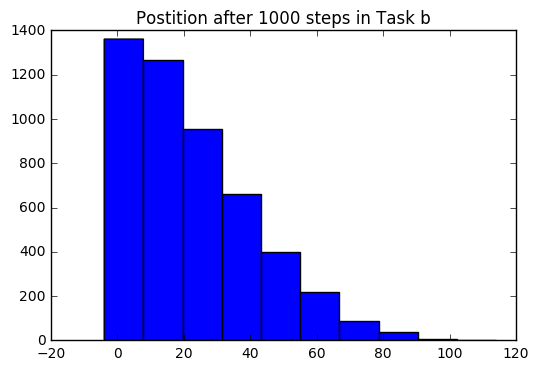

In [8]:
def diffusion_crack(p_r = 0.5, ref_bar = -4, n = 1000, par_block = False):
    pos = 0
    path = [pos]
    for _ in range(n):
        if pos == -4: pos = -3
        elif par_block and pos == 6:
            if random.random() < .25: pos += 1
            else: pos -= 1
        elif par_block and pos == 7:
            if random.random() < .25: pos -= 1
            else: pos += 1
        elif random.random() < p_r: pos += 1
        else: pos -= 1
        path.append(pos)
    return path


plt.plot(diffusion_crack())
plt.title("Walk for task a)")
plt.show()
plt.hist([diffusion_crack()[-1] for _ in range(5000)])
plt.title("Postition after 1000 steps in Task a")
plt.show()

plt.plot(diffusion_crack(par_block = True))
plt.title("Walk for task b)")
plt.show()
plt.hist([diffusion_crack()[-1] for _ in range(5000)])
plt.title("Postition after 1000 steps in Task b")
plt.show()

 (Wiener process/Brownian motion) Simulate a random walk in the
plane as follows. Start at the origin. From any given position, choose a direction
from 0 to 360 degrees equally likely, that is, uniformly on [0, 360).
Next choose a step size according to a Gaussian (normal) distribution with
mean 0 and variance σ2. Advance to that position and continue. Take σ2
to be, variously, 0.5, 1, 2, the idea being to see what effect variance has on
the walk. Take the number of steps to be, variously, 20, 400, 1600, again
to gauge the effect. Show a typical walk (i.e., a sample path) for one of the
1600 (or more) steps. Also, instead of histogramming, show a density plot,
that is, for several walkers, plot a point in the plane where the walker stops.

In [15]:
def wiener_process(var = 0.5, n = 20):
    path = np.zeros(shape=(n, 2))
    for i in range(n):
        theta = random.uniform(0, 360)
        step = random.normalvariate(0, var**.5)
        path[i] = path[i-1] + np.array([step*sin(theta), step*cos(theta)])
    return path

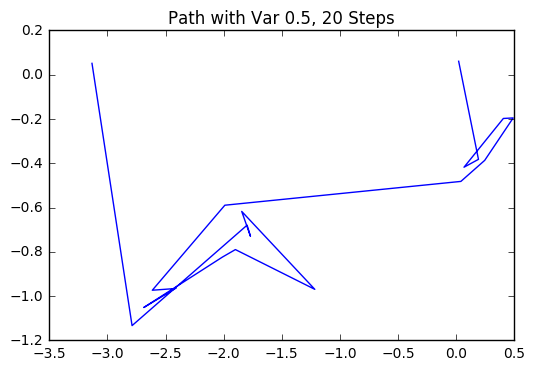

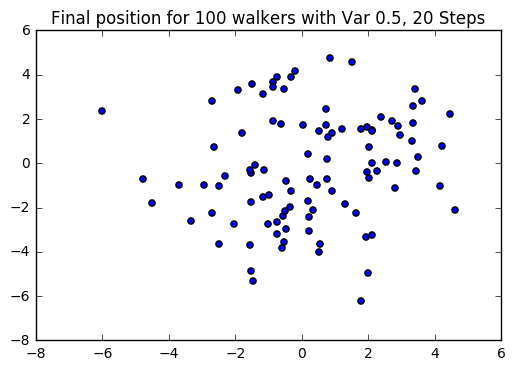

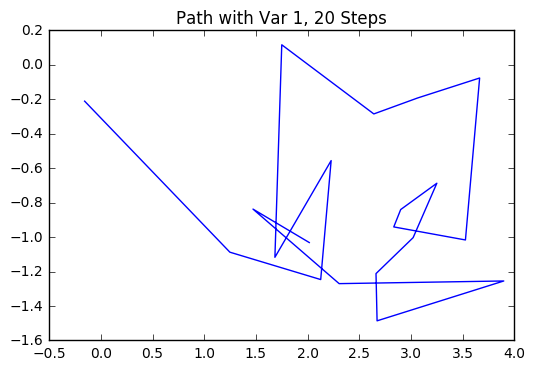

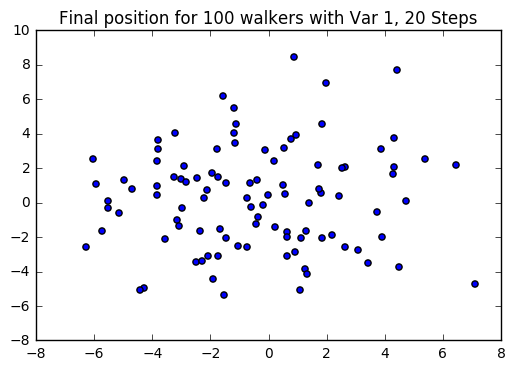

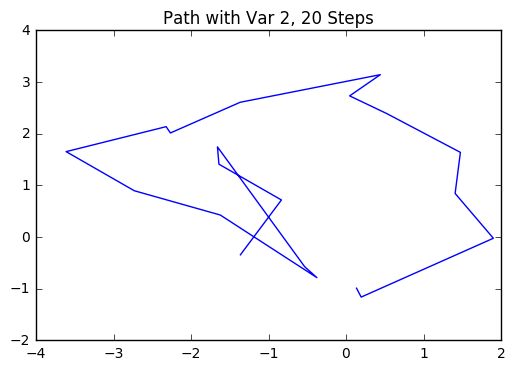

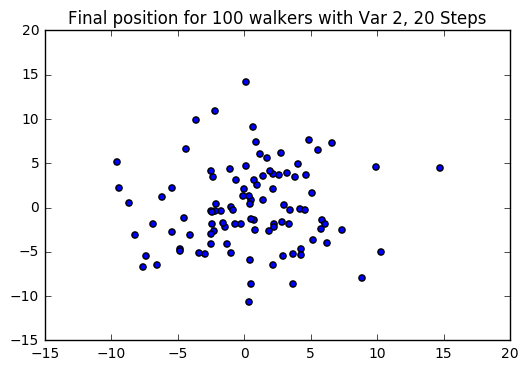

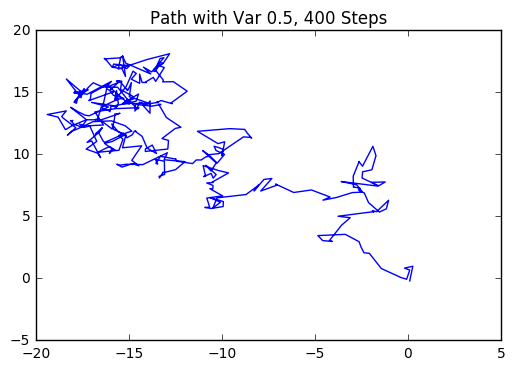

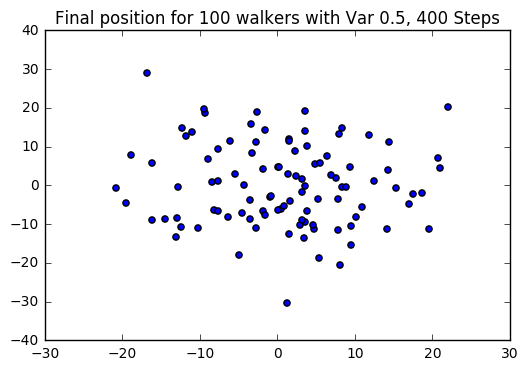

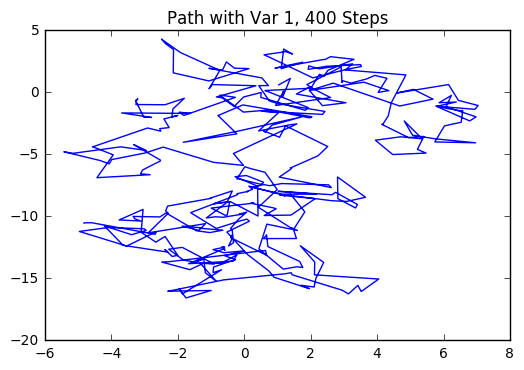

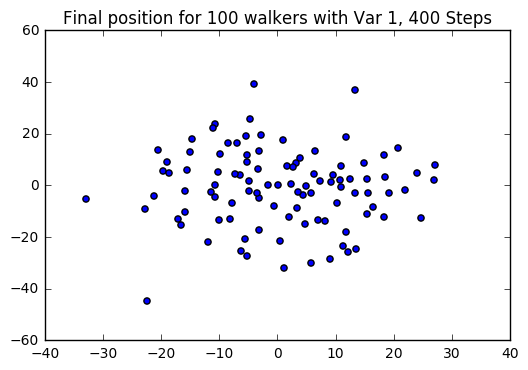

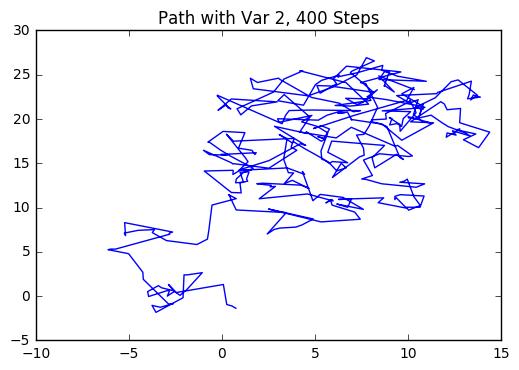

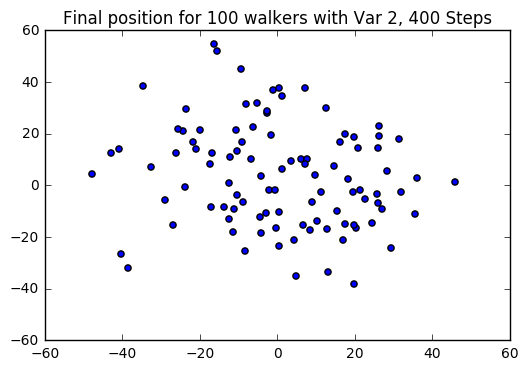

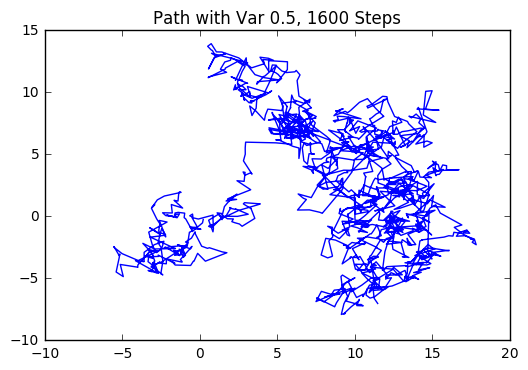

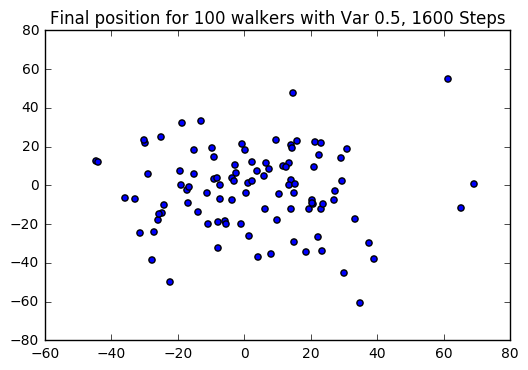

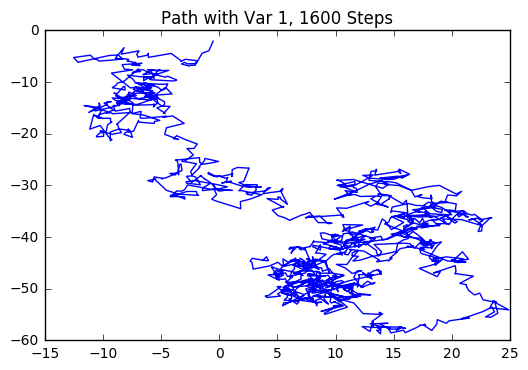

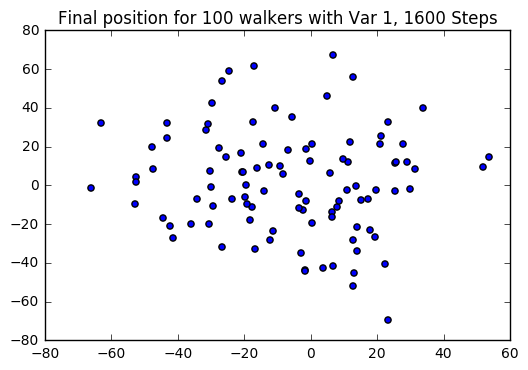

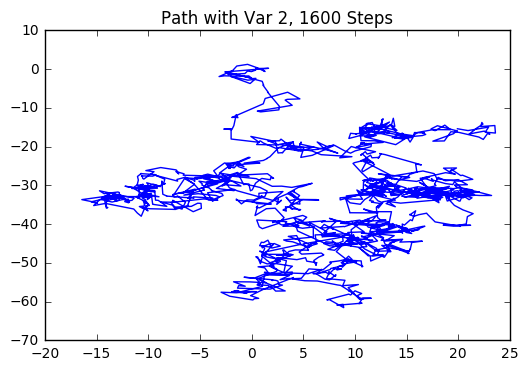

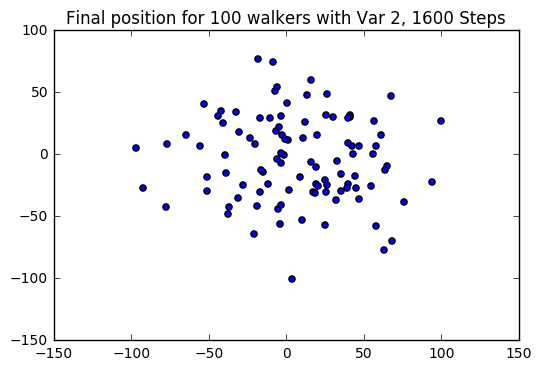

In [21]:
for n in [20,400,1600]:
    for var in [0.5, 1, 2]:
        path = wiener_process(var, n)
        plt.plot(path[:,0], path[:,1])
        plt.title("Path with Var {}, {} Steps".format(var, n))
        plt.show()
        plt.scatter(*zip(*[tuple(wiener_process(var, n)[-1,:]) for _ in range(100)]))
        plt.title("Final position for 100 walkers with Var {}, {} Steps".format(var, n))
        plt.show()

(Diffusion in the plane) (a) Starting at the origin in the plane, carry
out a random walk on the lattice of integer coordinate points over the
square [−20, 20] × [−20, 20]. Assume that there is a square hole whose
boundary is (13, 7), (14, 7), (14, 8), and (13, 8). Walks that reach this hole
are absorbed, along with any walk which reaches the boundary. Show the
distribution of final positions for walks of various steps and especially the
fraction that enters the hole. 

In [74]:
def diffusion_hole(n = 10000):
    path = np.zeros(shape=(n, 2))
    for i in range(n):
        dx, dy = 1, 1
        if random.random() < 0.5: dx = -1
        if random.random() < 0.5: dy = -1
        path[i] = np.array(path[i][0] + dx, path[i][1] + dy)
        
        if path[i][0] >= 20 or path[i][0] <= -20 or path[i][1] >= 20 or path[i][1] <= -20: 
            path[i] = path[i-1]
            return path, False
        if path[i][0] in [13,14] and path[i][1] in [7,8]: return path, True
    return path

In [75]:
diffusion_hole()

array([[-1., -1.],
       [-1., -1.],
       [-1., -1.],
       ..., 
       [-1., -1.],
       [ 1.,  1.],
       [-1., -1.]])